In [259]:
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
df = pd.read_csv("../data/processed/master_file.csv")

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19263 entries, 0 to 19262
Data columns (total 97 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  18654 non-null  float64
 1   date          19263 non-null  object 
 2   EPU_CAN       4428 non-null   float64
 3   IP_CAN        4656 non-null   float64
 4   10YS_CAN_x    1617 non-null   float64
 5   INF_CAN       428 non-null    float64
 6   EX_CAN        1573 non-null   float64
 7   IM_CAN        1570 non-null   float64
 8   RECESS_CAN    4636 non-null   float64
 9   GDP_CAN       1593 non-null   float64
 10  GDPC_CAN      152 non-null    float64
 11  GBR_CAN       3528 non-null   float64
 12  EXR_CAN       16130 non-null  float64
 13  CCI_CAN       3342 non-null   float64
 14  UNEMP_CAN     397 non-null    float64
 15  EPU_GER       4332 non-null   float64
 16  IP_GER        13 non-null     float64
 17  INF_GER       428 non-null    float64
 18  UNEMP_GER     721 non-null

### Drop residual columns

In [262]:
df = df.drop(columns=["Unnamed: 0_x", "Unnamed: 0_y"])

### Transform the column "date" into a datetime object

In [263]:
df["date"] = pd.to_datetime(df["date"])

### Remove unnecessary columns

In [264]:
df.columns

Index(['date', 'EPU_CAN', 'IP_CAN', '10YS_CAN_x', 'INF_CAN', 'EX_CAN',
       'IM_CAN', 'RECESS_CAN', 'GDP_CAN', 'GDPC_CAN', 'GBR_CAN', 'EXR_CAN',
       'CCI_CAN', 'UNEMP_CAN', 'EPU_GER', 'IP_GER', 'INF_GER', 'UNEMP_GER',
       'IM_GER', 'EX_GER', 'RECESS_GER', 'GDP_GER', 'GDPC_GER', '10YS_GER_x',
       'EXR_GER', 'EPU_JAP', 'IP_JAP', 'INF_JAP', 'UNEMP_JAP', 'EX_JAP',
       'RECESS_JAP', 'GDP_JAP', 'GDPC_JAP', '10YS_JAP_x', 'IMP_JAP', 'EXR_JAP',
       'EPU_USA', 'IP_USA', 'YS_USA', 'INF_USA', 'UNEMP_USA', 'EX_USA',
       'IMP_USA', 'BOPGSTB', 'RECESS_USA', 'GDP_USA', 'GDPC_USA', 'CCI_USA_x',
       'EPU_MEX', 'IP_MEX', 'INF_MEX', 'GDP_MEX', '2YS_MEX_x', '1OYS_MEX',
       'EXR_MEX', 'UNEMP_MEX', 'GDPC_MEX', 'EX_MEX', 'IMP_MEX', 'EX_MEX.1',
       'RECESS_MEX', 'UNEMP_MEX+', 'GDPC_MEX+', 'EPU_CHI', 'IP_CHI', 'INF_CHI',
       'IM_CHI', 'EX_CHI', 'TB_CHI', 'RECESS_CHI', 'GDP_CHI', '10YS_CHI_x',
       'EXR_CHI', 'UNEMP_CHI', 'GDPC_CHI', 'CCI_CHI', 'CCI_GER', 'CCI_JAP',
       'CCI_

In [265]:
df.drop(columns=["10YS_GER_x", "10YS_JAP_x", "2YS_MEX_x", "1OYS_MEX", "10YS_CAN_y", "2YS_CAN", "10YS_CAN_x", "10YS_MEX", "2YS_MEX_y", "10YS_JAP_y", "2YS_JAP", "2YS_CHI", "10YS_GER_y", "2YS_GER", "10YS_CHI_x"], inplace=True)

### Build dataframes to analyze each variable and compare with other countries'.

In [266]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("UNEMP")]
unemp_df = df[cols_to_keep]

In [267]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("GDP_")]
gdp_df = df[cols_to_keep]

In [268]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("GDPC")]
gdpc_df = df[cols_to_keep]

In [269]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("CCI")]
cci_df = df[cols_to_keep]

In [270]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("INF")]
inf_df = df[cols_to_keep]

In [271]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("YS")]
ys_df = df[cols_to_keep]

In [272]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("EX")]
ex_df = df[cols_to_keep]

In [273]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("IP")]
ip_df = df[cols_to_keep]

In [274]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("INF")]
inf_df = df[cols_to_keep]

In [275]:
cols_to_keep = ["date"] + \
               [col for col in df.columns if col.startswith("RECESS_")] + \
               [col for col in df.columns if col.startswith("IM")]
im_df = df[cols_to_keep]

### Unemployment Rate

In [276]:
unemp_cols = [col for col in df.columns if col.startswith("UNEMP")]
unemp_summary = df[unemp_cols].describe().T
display(unemp_summary.round(2))


,count,mean,std,min,25%,50%,75%,max
UNEMP_CAN,397.0,6.94,1.14,5.28,6.16,6.94,7.53,11.38
UNEMP_GER,721.0,3.64,0.81,2.63,2.84,3.74,4.08,5.77
UNEMP_JAP,420.0,3.53,0.98,1.17,2.68,3.26,4.23,5.61
UNEMP_USA,4872.0,6.11,2.10,2.50,4.50,5.45,7.70,14.80
UNEMP_MEX,4402.0,4.24,0.82,2.10,3.57,4.10,4.95,7.60
UNEMP_MEX+,397.0,4.05,0.84,2.60,3.42,3.87,4.89,7.10
UNEMP_CHI,397.0,4.55,0.31,2.37,4.53,4.57,4.63,5.00


In [278]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in unemp_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)


,date,value
UNEMP_CAN,1991-01-01,10.316000
UNEMP_GER,2005-01-01,5.509729
UNEMP_JAP,1968-01-01,1.208333
UNEMP_USA,1948-01-01,3.400000
UNEMP_MEX,1987-01-01,4.500000
UNEMP_MEX+,1991-01-01,3.145000
UNEMP_CHI,1991-01-01,2.370000


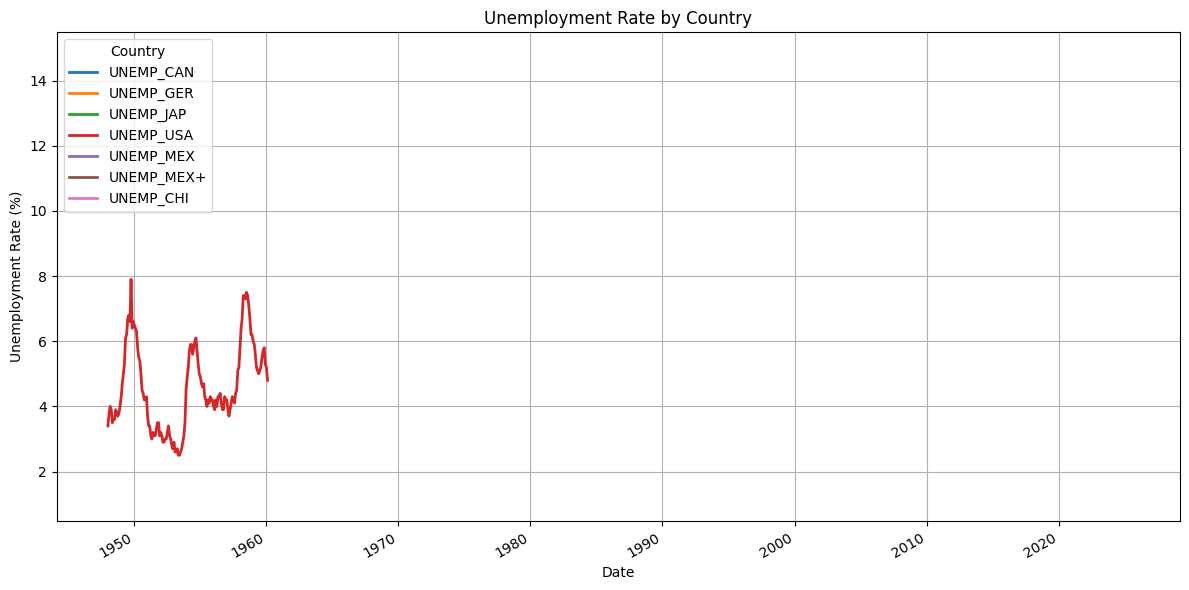

In [293]:
# Set date as index
unemp_df = unemp_df.set_index("date")

# Keep only unemployment columns (excluding recession flags)
unemp_only = unemp_df.filter(like="UNEMP")

# Plot all lines
unemp_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Unemployment Rate by Country")
plt.ylabel("Unemployment Rate (%)")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### GDP

In [294]:
gdp_cols = [col for col in df.columns if col.startswith("GDP_")]
gdp_summary = df[gdp_cols].describe().T
display(gdp_summary.round(2))


,count,mean,std,min,25%,50%,75%,max
GDP_CAN,1593.0,478584.35,98605.88,90980.80,459169.80,493851.50,5.386790e+05,6.135480e+05
GDP_GER,1473.0,698665.10,51854.10,514515.30,662510.10,697144.90,7.502130e+05,7.705843e+05
GDP_JAP,394.0,532716.11,20296.59,446532.70,520180.60,529645.30,5.512250e+05,5.575097e+05
GDP_USA,1649.0,17046.48,4619.49,2172.43,16582.71,17709.67,1.988235e+04,2.354235e+04
GDP_MEX,1465.0,5469376.30,509655.01,3306501.30,5077420.80,5499384.80,5.893045e+06,6.392275e+06
GDP_CHI,298.0,92263194.20,21712316.52,58547730.80,73138209.90,92319170.15,1.123560e+08,1.282321e+08


In [295]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in gdp_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)


,date,value
GDP_CAN,1961-01-01,9.098080e+04
GDP_GER,1991-01-01,5.177338e+05
GDP_JAP,1994-01-01,4.465327e+05
GDP_USA,1947-01-01,2.182681e+03
GDP_MEX,1993-01-01,3.450106e+06
GDP_CHI,2011-01-01,5.854773e+07


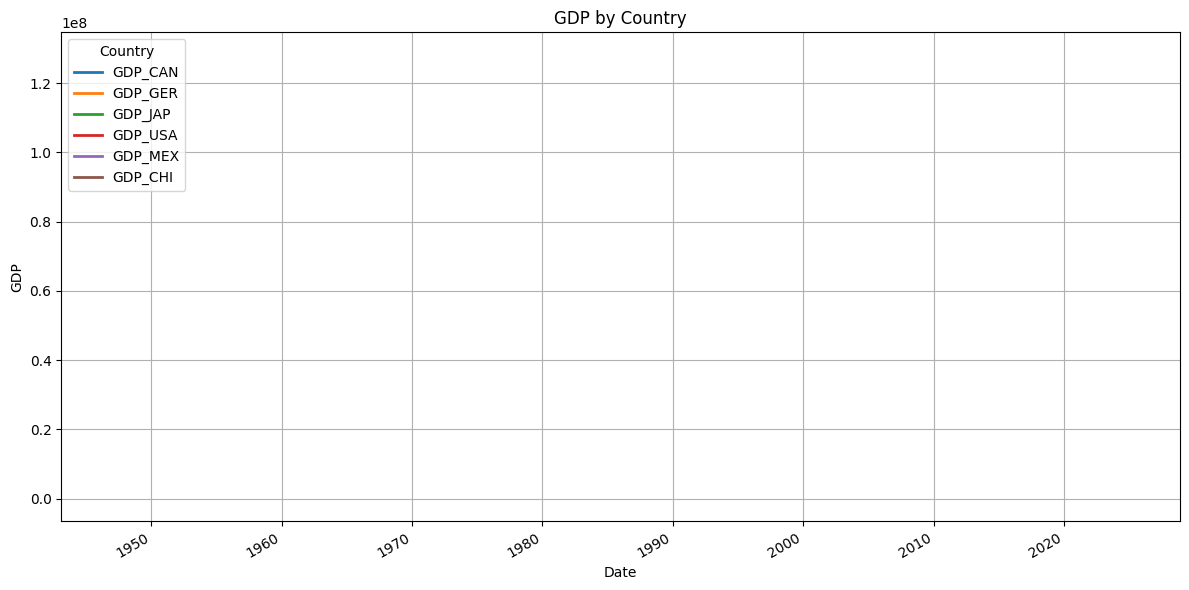

In [296]:
# Set date as index
gdp_df = gdp_df.set_index("date")

# Keep only unemployment columns (excluding recession flags)
gdp_only = gdp_df.filter(like="GDP")

# Plot all lines
gdp_only.plot(figsize=(12, 6), linewidth=2)
plt.title("GDP by Country")
plt.ylabel("GDP")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### GDP per Capita

In [297]:
gdpc_cols = [col for col in df.columns if col.startswith("GDPC")]
gdpc_summary = df[gdpc_cols].describe().T
display(gdpc_summary.round(2))


,count,mean,std,min,25%,50%,75%,max
GDPC_CAN,152.0,36206.53,7353.87,14733.00,33549.00,39951.00,40773.00,40973.00
GDPC_GER,152.0,33888.47,7661.23,12352.00,32780.25,38036.00,38515.00,39186.00
GDPC_JAP,152.0,30685.51,7658.19,6109.00,32009.50,34294.00,35040.00,35392.00
GDPC_USA,1649.0,54471.55,11133.23,15032.00,54401.00,55914.00,60674.00,69006.00
GDPC_MEX,405.0,9558.35,1015.80,4145.79,9491.52,9826.34,10100.50,10296.87
GDPC_MEX+,405.0,9560.04,2705.62,355.08,9097.92,10134.33,10744.13,13790.02
GDPC_CHI,405.0,7036.32,3785.98,70.91,3832.23,7636.07,10143.86,12662.58


In [298]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in gdpc_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)


,date,value
GDPC_CAN,1960-01-01,14733.000000
GDPC_GER,1960-01-01,12352.000000
GDPC_JAP,1960-01-01,6109.000000
GDPC_USA,1947-01-01,15248.000000
GDPC_MEX,1960-01-01,4145.793022
GDPC_MEX+,1960-01-01,355.075200
GDPC_CHI,1960-01-01,89.520214


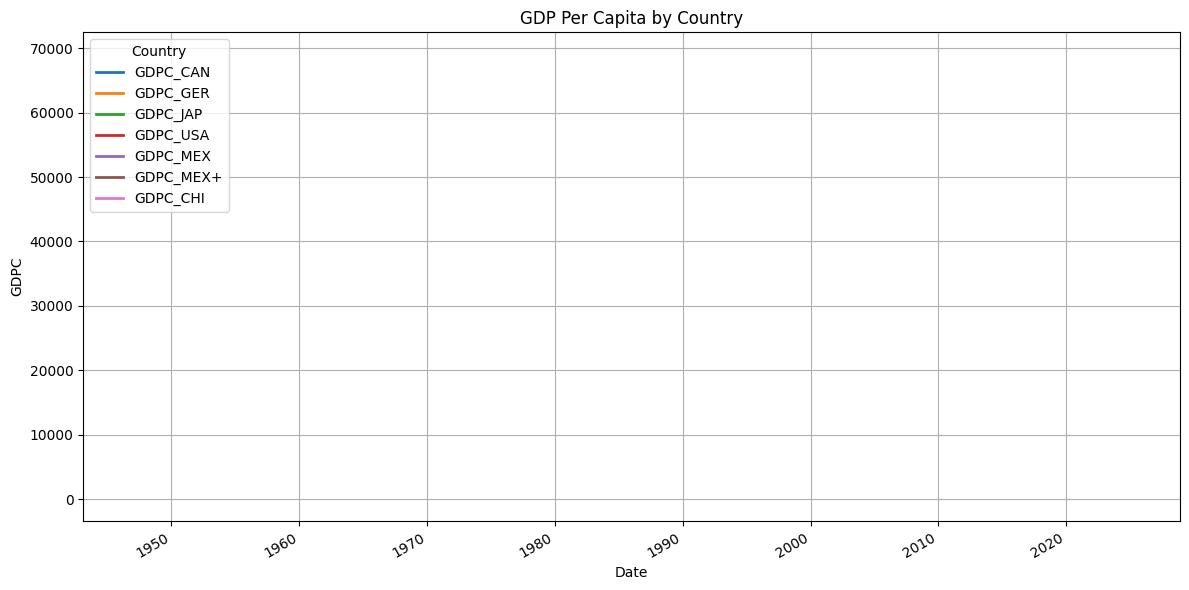

In [299]:
# Set date as index
gdpc_df = gdpc_df.set_index("date")

# Keep only unemployment columns (excluding recession flags)
gdpc_only = gdpc_df.filter(like="GDPC")

# Plot all lines
gdpc_only.plot(figsize=(12, 6), linewidth=2)
plt.title("GDP Per Capita by Country")
plt.ylabel("GDPC")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### Inflation

In [300]:
inf_cols = [col for col in df.columns if col.startswith("INF")]
inf_summary = df[inf_cols].describe().T
display(inf_summary)


,count,mean,std,min,25%,50%,75%,max
INF_CAN,428.0,2.447443,1.815199,0.165563,1.474790,1.949269,2.912135,12.471612
INF_GER,428.0,2.151364,1.748392,-0.129413,1.086413,1.732169,2.628380,7.032024
INF_JAP,428.0,1.093358,2.085526,-1.352837,-0.127259,0.468776,2.497703,23.222246
INF_USA,428.0,2.723550,2.044669,-0.355546,1.530417,2.130110,3.380830,13.549202
INF_MEX,428.0,6.596331,11.748296,0.594055,3.635961,4.156727,5.527961,131.827384
INF_CHI,401.0,2.574328,2.538282,-1.401473,1.437024,2.074790,2.899234,24.256990


In [301]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in inf_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)


,date,value
INF_CAN,1960-01-01,1.358696
INF_GER,1960-01-01,1.536612
INF_JAP,1960-01-01,3.574512
INF_USA,1960-01-01,1.457976
INF_MEX,1960-01-01,4.927519
INF_CHI,1987-01-01,7.233836


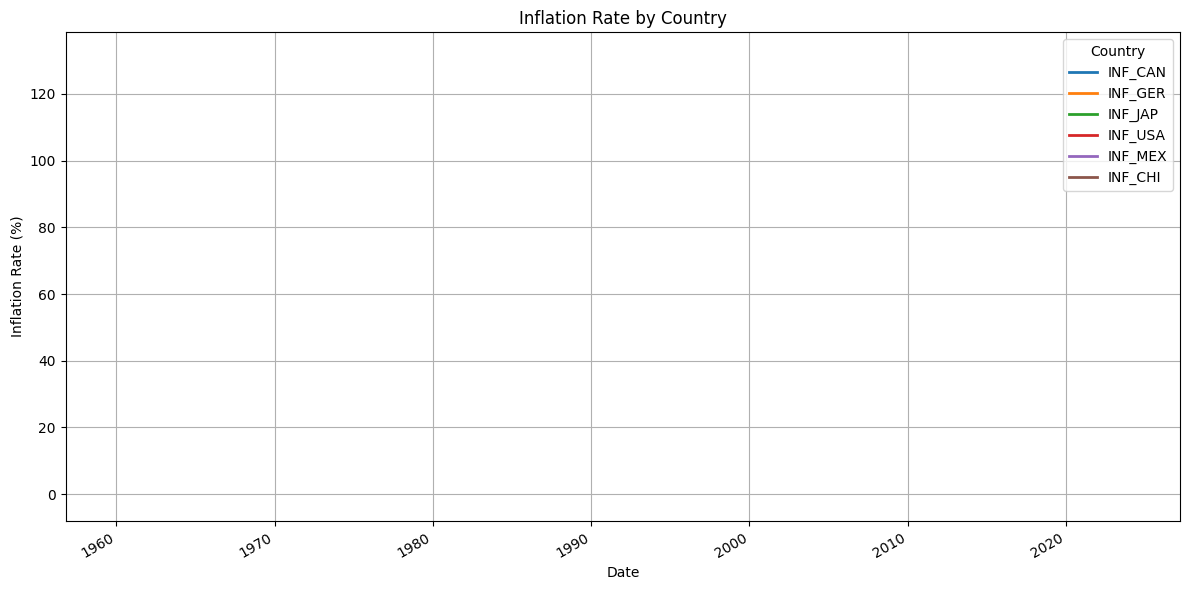

In [302]:
# Set date as index
inf_df = inf_df.set_index("date")

# Keep only unemployment columns (excluding recession flags)
inf_only = inf_df.filter(like="INF")

# Plot all lines
inf_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Inflation Rate by Country")
plt.ylabel("Inflation Rate (%)")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### Imports

In [303]:
im_cols = [col for col in df.columns if col.startswith("IM")]
im_summary = df[im_cols].describe().T
display(im_summary)

,count,mean,std,min,25%,50%,75%,max
IM_CAN,1570.0,6.101753e+11,1.674903e+11,4.038000e+10,5.767920e+11,6.610850e+11,7.169760e+11,8.047600e+11
IM_GER,1450.0,2.824188e+11,5.487876e+10,9.526430e+10,2.419912e+11,2.762202e+11,3.330680e+11,3.810053e+11
IMP_JAP,1461.0,9.053221e+04,1.204467e+04,4.547620e+04,8.150090e+04,9.441710e+04,9.882520e+04,1.141083e+05
IMP_USA,1649.0,2.386665e+03,8.680134e+02,4.868700e+01,2.325941e+03,2.479452e+03,2.923573e+03,4.031802e+03
IMP_MEX,1445.0,2.015999e+06,4.241013e+05,5.111818e+05,1.697296e+06,1.961966e+06,2.387901e+06,2.942201e+06
IM_CHI,303.0,1.012212e+07,3.885121e+06,1.883141e+05,6.735427e+06,1.140740e+07,1.291905e+07,1.492873e+07


In [304]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in im_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)


,date,value
IM_CAN,1961-01-01,4.050200e+10
IM_GER,1991-01-01,1.002476e+11
IMP_JAP,1994-01-01,4.547620e+04
IMP_USA,1947-01-01,5.386100e+01
IMP_MEX,1993-01-01,5.183715e+05
IM_CHI,1982-01-01,1.883141e+05


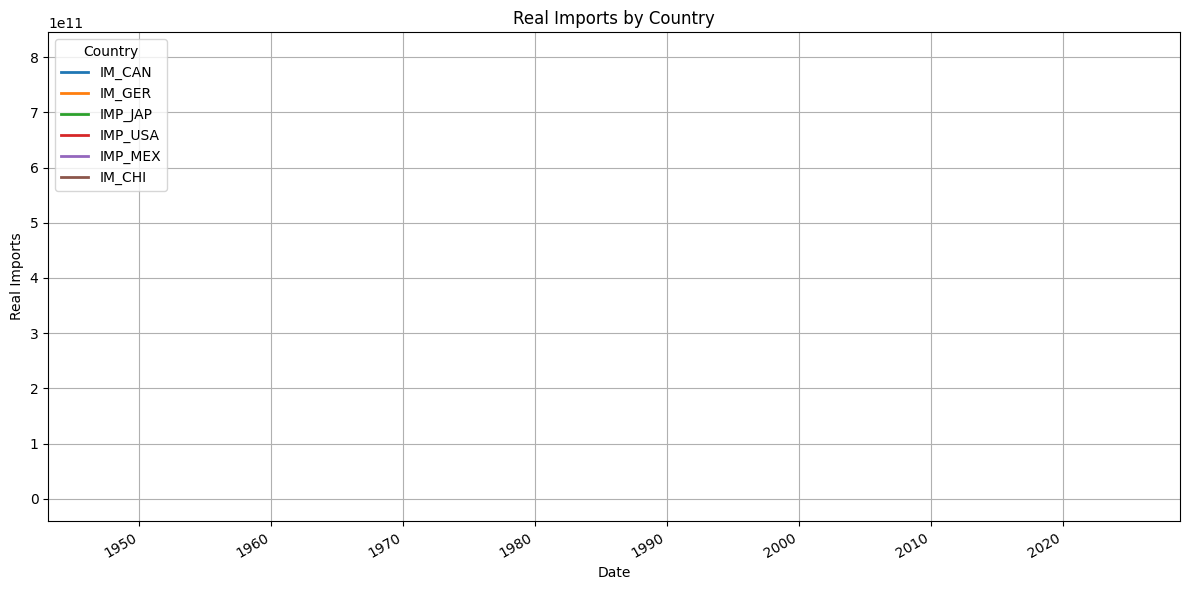

In [305]:
# Set date as index
im_df = im_df.set_index("date")

# Keep only unemployment columns (excluding recession flags)
im_only = im_df.filter(like="IM")

# Plot all lines
im_only.plot(figsize=(12, 6), linewidth=2)
plt.title("Real Imports by Country")
plt.ylabel("Real Imports")
plt.xlabel("Date")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

### Exports

In [306]:
ex_cols = [col for col in df.columns if col.startswith("EX")]
ex_summary = df[ex_cols].describe().T
display(ex_summary)

,count,mean,std,min,25%,50%,75%,max
EX_CAN,1573.0,1.454794e+05,3.679728e+04,1.153680e+04,1.414563e+05,1.505098e+05,1.677213e+05,1.863190e+05
EXR_CAN,16130.0,1.222456e+00,1.589124e-01,9.168000e-01,1.075625e+00,1.234600e+00,1.339875e+00,1.612800e+00
EX_GER,1450.0,3.287253e+11,6.106067e+10,9.760980e+10,2.926957e+11,3.302965e+11,3.868314e+11,4.125892e+11
EXR_GER,428.0,9.937419e-01,6.082066e-01,6.799227e-01,7.528909e-01,8.467727e-01,9.085385e-01,4.200000e+00
EX_JAP,394.0,-4.927061e+02,3.911601e+03,-1.745850e+04,-3.648500e+03,2.262000e+02,2.871400e+03,4.974600e+03
EXR_JAP,16118.0,1.481532e+02,6.705506e+01,7.572000e+01,1.067400e+02,1.183200e+02,1.565000e+02,3.584400e+02
EX_USA,1649.0,1.900570e+03,6.665831e+02,5.766500e+01,1.768587e+03,2.137473e+03,2.306749e+03,2.652774e+03
EXR_MEX,140.0,8.072972e+00,5.379121e+00,8.650000e-03,2.346250e-01,1.092820e+01,1.263600e+01,1.351350e+01
EX_MEX,4486.0,2.923723e+10,9.411516e+09,9.906710e+08,2.340172e+10,3.116818e+10,3.484296e+10,5.376252e+10
EX_MEX.1,1445.0,1.858784e+06,4.562593e+05,4.447923e+05,1.390005e+06,1.856834e+06,2.311917e+06,2.691016e+06


In [307]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in ex_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)

,date,value
EX_CAN,1961-01-01,1.166550e+04
EXR_CAN,1971-01-04,1.010900e+00
EX_GER,1991-01-01,1.085699e+11
EXR_GER,1960-01-01,4.200000e+00
EX_JAP,1994-01-01,-8.632900e+03
EXR_JAP,1971-01-04,3.577300e+02
EX_USA,1947-01-01,9.376700e+01
EXR_MEX,1950-01-01,8.650000e-03
EX_MEX,1980-01-01,1.061185e+09
EX_MEX.1,1993-01-01,4.456525e+05


### Industrial Production

In [308]:
ip_cols = [col for col in df.columns if col.startswith("IP")]
ip_summary = df[ip_cols].describe().T
display(ip_summary)

,count,mean,std,min,25%,50%,75%,max
IP_CAN,4656.0,2.747183e+10,4.442177e+09,6.424491e+09,2.719608e+10,2.865108e+10,2.983650e+10,3.189942e+10
IP_GER,13.0,7.384615e+01,2.030946e+01,3.700000e+01,6.500000e+01,7.200000e+01,8.900000e+01,1.010000e+02
IP_JAP,410.0,9.645431e+01,1.801955e+01,6.339779e+00,9.583640e+01,1.000583e+02,1.027873e+02,1.169454e+02
IP_USA,5219.0,8.554044e+01,2.850346e+01,3.682700e+00,8.950460e+01,9.864340e+01,1.011948e+02,1.041490e+02
IP_MEX,4428.0,9.347211e+01,9.807652e+00,4.672664e+01,9.254153e+01,9.560997e+01,9.970022e+01,1.074816e+02
IP_CHI,3902.0,1.098317e+02,4.783950e+00,8.650000e+01,1.061000e+02,1.089000e+02,1.135000e+02,1.232000e+02


In [309]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in ip_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)


,date,value
IP_CAN,1961-01-01,6.442989e+09
IP_GER,1919-01-01,3.700000e+01
IP_JAP,1955-01-01,6.339779e+00
IP_USA,1919-01-01,4.865400e+00
IP_MEX,1980-01-01,4.825867e+01
IP_CHI,1999-01-01,1.179000e+02


### Yield Spread

In [310]:
ys_cols = [col for col in df.columns if col.startswith("YS")]
ys_summary = df[ys_cols].describe().T
display(ys_summary)


,count,mean,std,min,25%,50%,75%,max
YS_USA,4531.0,1.203668,0.878713,-2.140000,0.470000,1.220000,1.870000,2.830000
YS_CAN,4187.0,0.796215,0.620760,-1.198000,0.273500,0.741818,1.214000,2.265000
YS_MEX,3032.0,1.120373,1.085365,-2.880000,0.180000,1.060000,2.120000,3.020000
YS_JAP,4363.0,0.566583,0.399450,-0.570000,0.187000,0.521000,0.866000,4.324000
YS_CHI,102.0,0.616638,0.436925,-0.134400,0.344300,0.493800,0.796525,1.836500
YS_GER,4367.0,0.166863,1.541999,-11.695995,0.067305,0.359391,0.719161,1.986082


In [311]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in ys_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)

,date,value
YS_USA,1976-06-01,0.8000
YS_CAN,2005-01-01,1.4505
YS_MEX,2001-07-01,-1.9200
YS_JAP,1990-05-01,-0.0630
YS_CHI,2006-03-01,0.9180
YS_GER,1990-01-01,-3.1378


### CCI

In [312]:
cci_cols = [col for col in df.columns if col.startswith("CCI")]
cci_summary = df[cci_cols].describe().T
display(cci_summary)

,count,mean,std,min,25%,50%,75%,max
CCI_CAN,3342.0,99.821520,1.112440,96.68637,99.207217,99.77762,100.626347,103.01054
CCI_USA_x,4603.0,82.459917,12.204820,50.00000,72.900000,82.60000,93.200000,112.00000
CCI_CHI,4309.0,100.058247,2.407261,93.01456,98.199310,99.47843,102.179200,104.63090
CCI_GER,4514.0,100.559300,1.158841,95.88611,99.933340,100.82960,101.444500,103.74560
CCI_JAP,4403.0,99.526111,1.358694,95.46452,98.921160,99.74549,100.447100,102.44120
CCI_MEX,4175.0,99.333763,2.713379,93.74681,97.358650,98.76127,101.876000,105.38570
CCI_USA_y,4670.0,99.626776,1.406727,96.19712,98.557850,99.67730,100.908900,102.85010


In [313]:
summary = {
    col: {
        "date": df.loc[df[col].first_valid_index(), "date"],
        "value": df[col].loc[df[col].first_valid_index()]
    }
    for col in cci_cols
}

first_entries = pd.DataFrame.from_dict(summary, orient="index")
display(first_entries)

,date,value
CCI_CAN,1980-01-01,99.955116
CCI_USA_x,1952-11-01,86.200000
CCI_CHI,1990-01-01,99.133120
CCI_GER,1973-01-01,103.745600
CCI_JAP,1982-04-01,100.600400
CCI_MEX,2001-04-01,104.746600
CCI_USA_y,1960-01-01,101.633100
